# Lab4 Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fft as fft
# %matplotlib widget
%matplotlib inline
plt.style.use('seaborn-whitegrid')
fs=500

def createSubplot(row,col=1):
    fig,ax = plt.subplots(row,col,figsize=(16,9))
    fig.tight_layout(pad=3.0)
    return fig,ax

def calFFT(signal,fs):
    number_sample = signal.shape[0]
    realRange = fs//2

    mag = np.abs(fft(signal))
    mag_norm = mag / (number_sample/2)
    mag_range = mag_norm[:number_sample//2]

    f_range = np.linspace(0,realRange,number_sample//2)
    
    return mag_range, f_range

1. Describe in breif in the following filters
- Butterworth
- Chebyshev 1
- Chebyshev 2
- Ellipticol (Ellipticol)

2. plot the frequency response of the above filters
- Equiripple Amplitube Characeristic of the filters

3. Demonstrate the use of above filters in removing noise from a signal.

In [2]:
# 2. Let's plot frequency response of each filter first
filter_bw = 0
filter_c1 = 1
filter_c2 = 2
filter_el = 3
filter_name = ['Butterworth', 'Chebyshev 1', 'Chebyshev 2', 'Ellipticol']
def getFilter(filter=0,order=2,lowcut=-1,highcut=-1,fs=500, rp=2, rs=20):
    b,a = None, None
    cut_off = None
    btype = None
    if(lowcut != -1 and highcut != -1):
        cut_off = [lowcut,highcut]
        btype = 'bandpass'
    elif(lowcut != -1):
        cut_off = lowcut
        btype = 'highpass'
    elif(highcut != -1):
        cut_off = highcut
        btype = 'lowpass'
    else:
        raise ValueError(f"Both lowcut and highcut cannot be -1 at the same time")

    if(filter == 0):
        # scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
        b,a = signal.butter(N=order,Wn=cut_off,btype=btype,output='ba',fs=fs)
    elif(filter == 1):
        # scipy.signal.cheby1(N, rp, Wn, btype='low', analog=False, output='ba', fs=None)
        b,a = signal.cheby1(N=order,Wn=cut_off,btype=btype,output='ba',fs=fs, rp=rp)
    elif(filter == 2):
        # scipy.signal.cheby2(N, rs, Wn, btype='low', analog=False, output='ba', fs=None)
        b,a = signal.cheby2(N=order,Wn=cut_off,btype=btype,output='ba',fs=fs, rs=rs)
    elif(filter == 3):
        # scipy.signal.ellip(N, rp, rs, Wn, btype='low', analog=False, output='ba', fs=None)
        b,a = signal.ellip(N=order,Wn=cut_off,btype=btype,output='ba',fs=fs, rp=rp,rs=rs)
    else:
        raise ValueError(f"No filter type {filter}")
    return b,a

def getFreqResponse(b,a,fs):
    w,n = signal.freqz(b,a,worN=(fs//2))
    return w/np.pi,abs(n)

# 2. The Response of filters

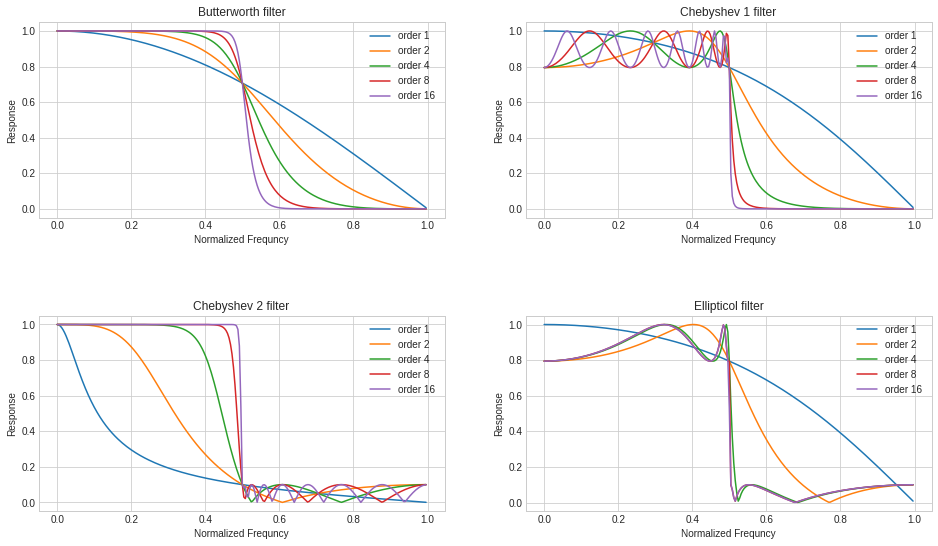

In [3]:
orders = [1,2,4,8,16]
filters = [filter_bw,filter_c1,filter_c2,filter_el]
fig = plt.figure(figsize=(16,9))
fig.subplots_adjust(hspace=0.5)
for i,filter in enumerate(filters):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title(f"{filter_name[filter]} filter")
    ax.set_xlabel('Normalized Frequncy')
    ax.set_ylabel('Response')
    for order in orders:
        # print(filter,order)
        b,a = getFilter(filter=filter,order=order,lowcut=-1,highcut=fs//4,fs=500)
        w,n = getFreqResponse(b,a,fs=500)
        ax.plot(w,n, label=f"order {order}")
    ax.legend()
plt.show()

# 1. 
Describe in breif in the following filters

Monotonic: The characteristic of which the response of the filter is smooth (no fluctuation)

Equiripple: The characteristic of which the response of the filter is fluctuated

Passband: The section where the response is 1

Stopband: The section where the response is 0


- Butterworth
    - Both Passband and Stopband are Monotonic 

- Chebyshev 1
    - The Passband has ripples but not in the Stopband

- Chebyshev 2
    - The Stopband has ripples but not in the Passband

- Ellipticol (Ellipticol)
    - Both Passband and Stopband are Equiripple


# 3. Filter in action

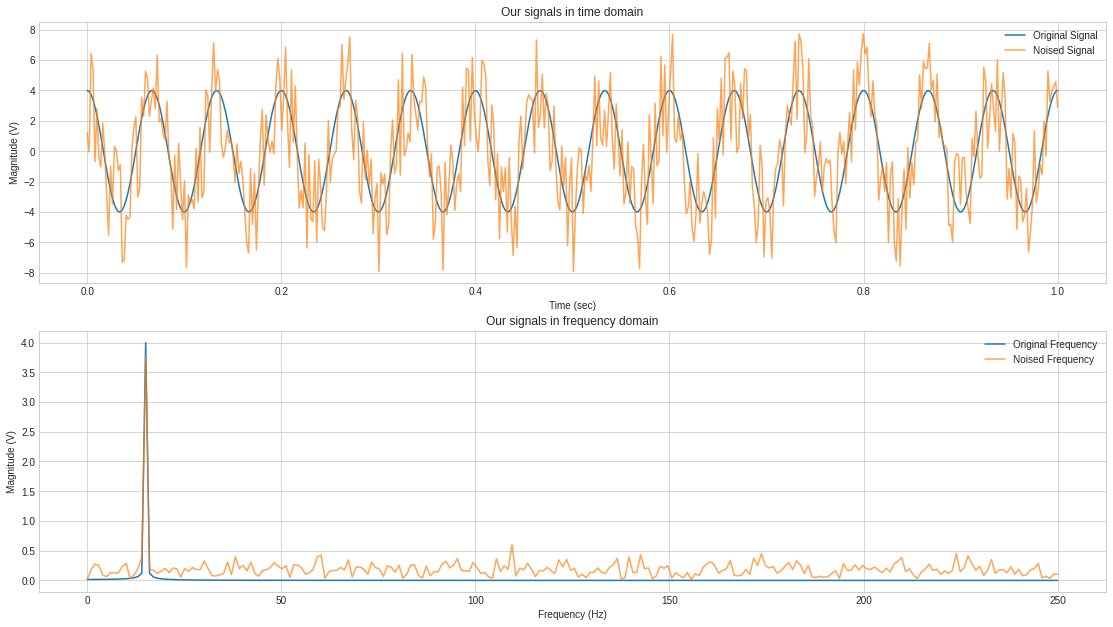

In [4]:
fs = 500
f = 15
t = np.linspace(0,1,fs)
s = 4 * np.cos(2 * np.pi * f * t)
noise = 4*((np.random.rand(fs) * 2) - 1)
noise_s = s + noise

fig,ax = createSubplot(2)

ax[0].plot(t,s,label='Original Signal')
ax[0].plot(t,noise_s,alpha=0.7,label='Noised Signal')
ax[0].set_xlabel('Time (sec)')
ax[0].set_ylabel('Magnitude (V)')
ax[0].set_title('Our signals in time domain')
ax[0].legend()

m_s, f_s = calFFT(s,fs)
h = np.argmax(m_s)
ax[1].plot(f_s,m_s,label='Original Frequency')
m_s, f_s = calFFT(noise_s,fs)
h = np.argmax(m_s)
ax[1].plot(f_s,m_s,alpha=0.7,label='Noised Frequency')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude (V)')
ax[1].set_title('Our signals in frequency domain')
ax[1].legend()

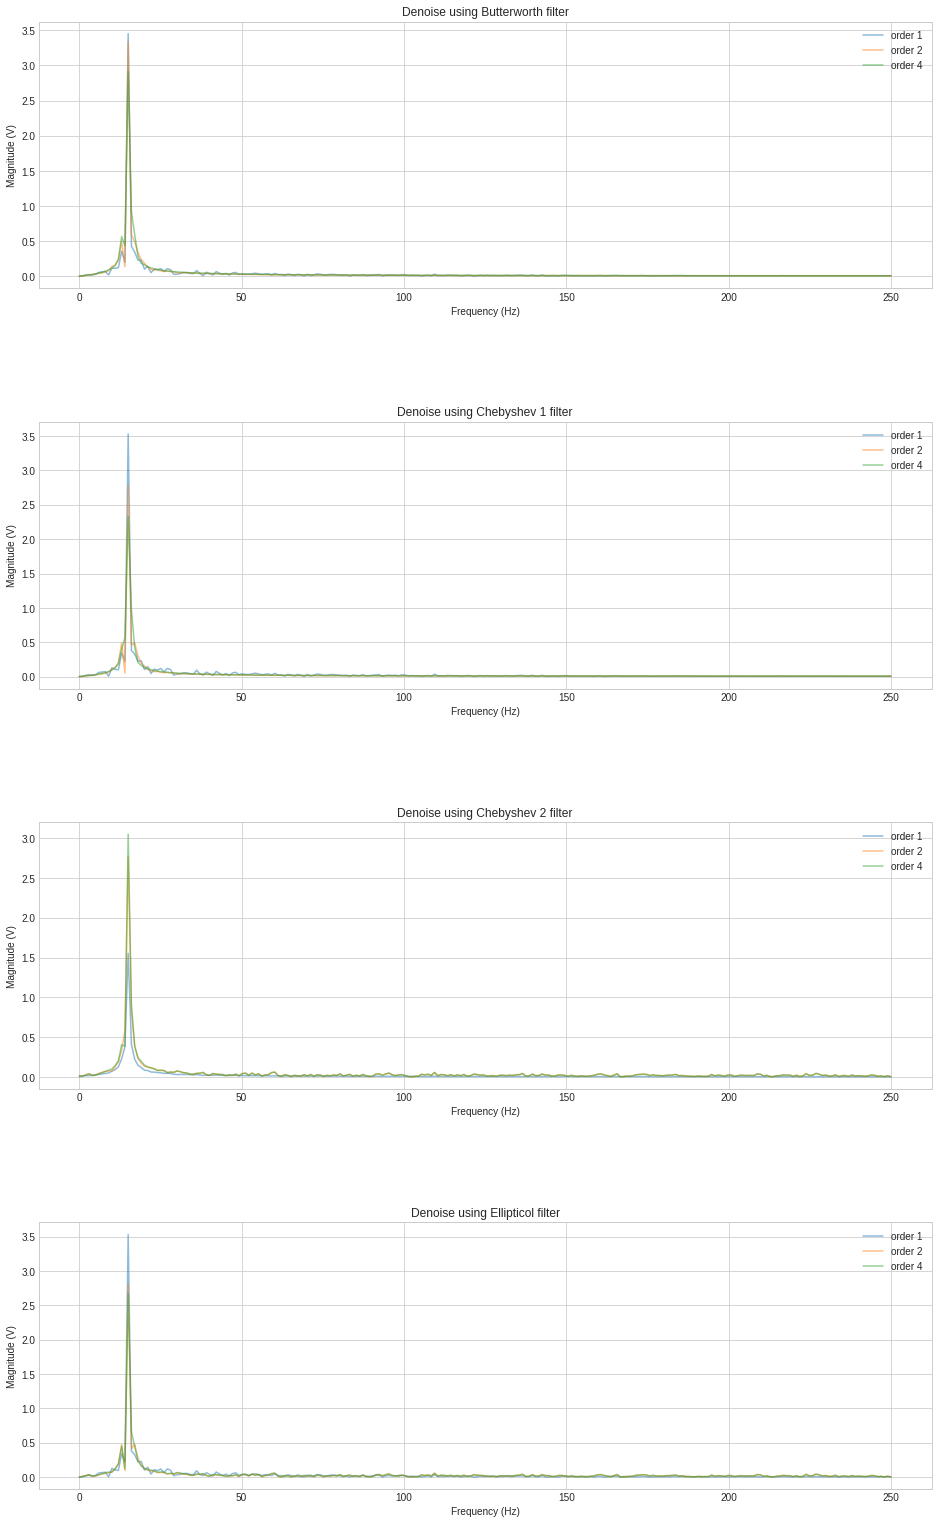

In [5]:
filtered = []
fig = plt.figure(figsize=(16,27))
fig.subplots_adjust(hspace=0.5)
for filter in filters:
    ax = fig.add_subplot(4,1,filter+1)
    ax.set_title(f"Denoise using {filter_name[filter]} filter")
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Magnitude (V)')
    for i, order in enumerate(orders[:-2]):
        b,a = getFilter(filter=filter,order=order,lowcut=13,highcut=17,fs=500)
        tmp = signal.lfilter(b,a,noise_s)
        m_s, f_s = calFFT(tmp,fs)
        h = np.argmax(m_s)
        ax.plot(f_s,m_s,alpha=0.5,label=f"order {order}")
    ax.legend()

# Interpretation
Due to the Monotonic in stopband section of both Butterworth and Cherbyshev 1, the noises outside 14-17 Hz is removed significantly.

Some of the noise is remain exist in the other two filters (Cherbyshev 2 and Ellipticol) because both filters allow some freqency to pass due to Equiripple nature.

Follow the same logic, Cherbyshev 1 and Ellipticol are affecting the 15Hz because of the Equiripple characteristic.

Interestingly, Cherbyshev 2 with order 1 reduced the 15 Hz by more than half. This is as expected due to the freqency response of Cherbyshev 2 with order 1.
